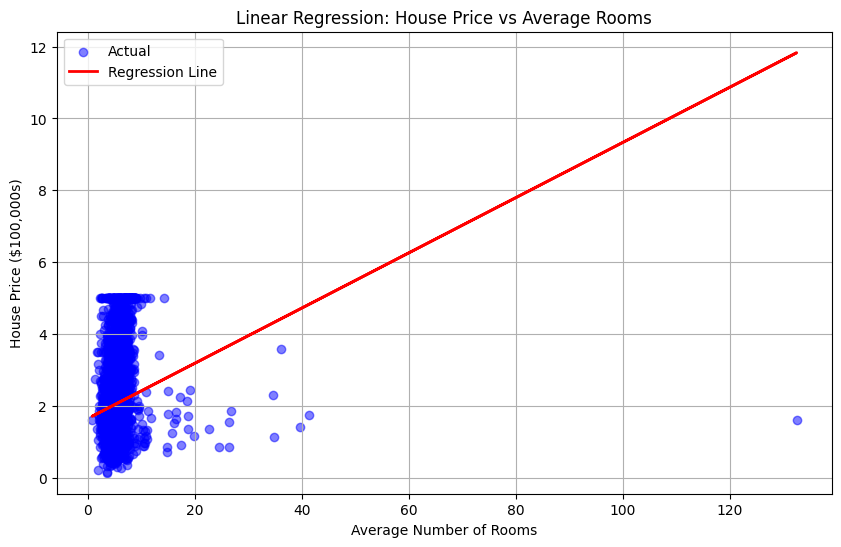

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline   


# 1. Load the dataset
housing = fetch_california_housing()
X = housing.data  # features
y = housing.target  # target (house price)

# Use only one feature (e.g., average number of rooms - AveRooms is column index 2)
X_rooms = X[:, [2]]  # Reshape for sklearn

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=42)

# 3. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and get regression line
y_pred = model.predict(X_test)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Average Number of Rooms")
plt.ylabel("House Price ($100,000s)")
plt.title("Linear Regression: House Price vs Average Rooms")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data  # all 8 features
y = housing.target  # target (house price)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = model.predict(X_test)

# 5. Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("📊 Model Evaluation:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 6. Display coefficients
print("\n📈 Feature Coefficients:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")


📊 Model Evaluation:
R-squared: 0.5758
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456

📈 Feature Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [5]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model WITHOUT Scaling ---
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Evaluate model 1
r2_1 = r2_score(y_test, y_pred1)
mse_1 = mean_squared_error(y_test, y_pred1)
rmse_1 = np.sqrt(mse_1)

# --- Apply StandardScaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model WITH Scaling ---
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

# Evaluate model 2
r2_2 = r2_score(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)
rmse_2 = np.sqrt(mse_2)

# --- Print results ---
print("📊 Model Performance Comparison")
print("Before Scaling:")
print(f"R²: {r2_1:.4f}, MSE: {mse_1:.4f}, RMSE: {rmse_1:.4f}")

print("\nAfter Scaling (Standardized Features):")
print(f"R²: {r2_2:.4f}, MSE: {mse_2:.4f}, RMSE: {rmse_2:.4f}")


📊 Model Performance Comparison
Before Scaling:
R²: 0.5758, MSE: 0.5559, RMSE: 0.7456

After Scaling (Standardized Features):
R²: 0.5758, MSE: 0.5559, RMSE: 0.7456


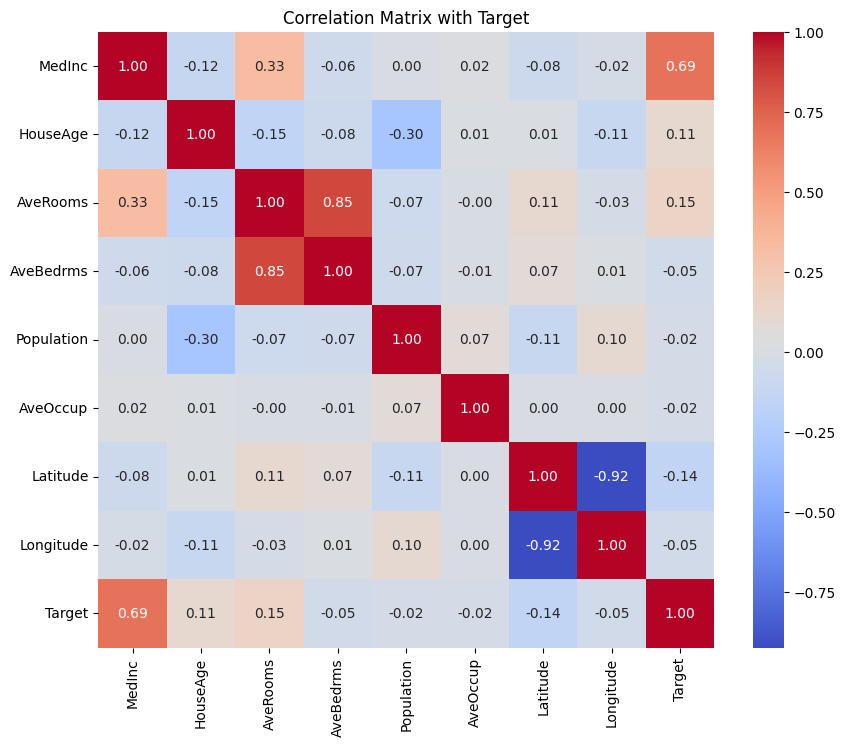

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Load dataset and convert to DataFrame
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X['Target'] = y  # Add target column for correlation

# 2. Compute correlation matrix
corr_matrix = X.corr()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix with Target")
plt.show()


In [7]:
# Sort correlation values with respect to target
print("📈 Feature correlation with target:")
print(corr_matrix['Target'].drop('Target').sort_values(ascending=False))


📈 Feature correlation with target:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64
